 The following criteria will be used to evaluate your submission:
* 5 Projects are mandatory for every student
* There must be at least **three columns and 150 rows** in the dataset
* At least **four questions** must be asked and answered about the dataset
* At least **four visualisations (graphs)** must be included in your submission
* Apart from the code, your submission must include **explanations using markdown** cells.
* The work you submit must **not be plagiarised**
* Follow this step-by-step guide to work on your project.


# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**THE BELOW DATASET IS ABOUT THE HOTELS IN DIFFERENT COUNTRIES THAT ARE FACING THE PROBLEM OF HIGH CANCELLATION OF BOOKINGS WHICH MIGHT EFFECT THE ANNUAL PROFIT OF THE HOTEL TO SOME EXTENT**
**LETS SEE HOW CAN WE HELP THEM TO MANAGE THIS PROBLEM BY FINDING OUT THE CAUSES OF THE CANCELLATIONS TO MAXIMIZE THEIR PROFIT BY HELPING THEM IN MINIMISING THE CANCELLATION RATES BY CERTAIN SUGGESTIONS**

**QUESTIONS** 
1. Find out the most cancellations are in which hotels. is it city hotel or resort hotel ?
2. What are the factors that contribute to the cancellations of the hotels ?
3. Which are the Country hotels that have majority cancellations ?
4. From which market segment are majority of the cancellations coming ?
5. What measures can be taken to decrese the cancellations of hotels ?


**LOADING THE DATASET**

In [2]:
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")
df.head()   #to display the first 5 rows of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# DATA CLEANING

In [3]:
df.columns   #columns is used to find out all the columns in the dataset

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.shape    #to find out the rows and cols in the dataset

(119390, 32)

In [5]:
df.info()   #gives all the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Changing data types of columns to make efficient use 
Convert reservation status date from object to date time format

In [6]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

data type of reservation status date is changed successful

In [7]:
df.info()    #prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

LETS FIND OUT THE NULL VALUES IN THE DATASET

In [8]:
df.isnull().sum()   #function returns the number of NaN values in all columns of a Pandas DataFrame.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Drop the cols agent and company as it is not very essential for the analysis

In [9]:
df.drop(['agent', 'company'], axis = 1, inplace = True)

In [10]:
df.info()   #columns have been droped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

dropping null values

In [12]:
df.dropna(inplace = True)  # all the remaining null values also have been dropped

In [13]:
df.isnull().sum()   #null values also have been removed successful

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


Let's visualize the cancelled bookings of the hotel

In [15]:
bookings = df['is_canceled'].value_counts(normalize = True)#in the output 0 is False i.e not cancelled and 1 is True i.e cancelled
bookings

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64

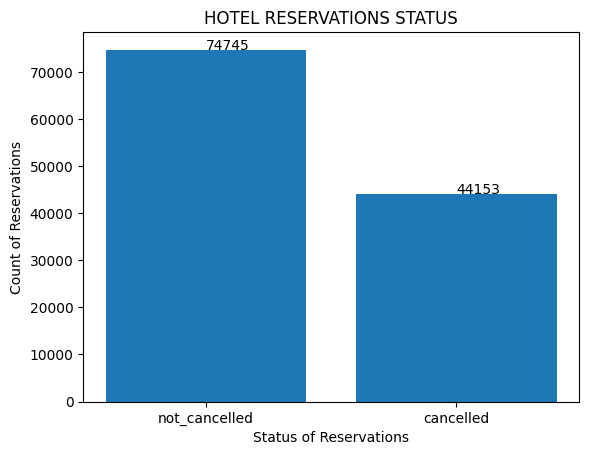

In [16]:
def addlabels(status,bookings):
    for i in range(len(status)):
        plt.text(i, bookings[i],bookings[i])

status = ['not_cancelled', 'cancelled']
bookings = [74745, 44153]
bars = plt.bar(status, bookings  )
plt.title("HOTEL RESERVATIONS STATUS")
plt.xlabel("Status of Reservations")
plt.ylabel("Count of Reservations")
addlabels(status,bookings)

**The bar graph illustrates the distribution of reservations into two categories: those that are cancelled and those that are not. Notably, canceled reservations account for a substantial 37% of the dataset, signifying a high rate of cancellations. This has a notable impact on the hotel's earnings, as a significant portion of potential revenue is being lost due to these cancellations. Addressing the reasons behind these cancellations and implementing strategies to reduce them is crucial for maximizing revenue and improving overall financial performance.**


* Next let's see among hotels is it City hotel or Resort hotel which has the high number of cancellations and lets narrow it down from there

In [17]:
df.groupby(['hotel'])['is_canceled'].sum()

hotel
City Hotel      33076
Resort Hotel    11077
Name: is_canceled, dtype: int64

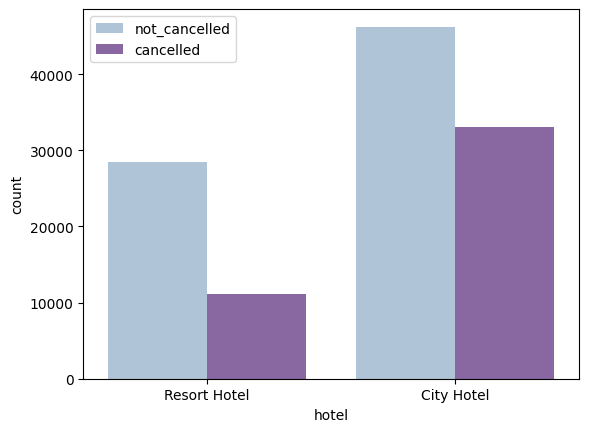

In [18]:
sns.countplot(x = 'hotel', hue = 'is_canceled' , data = df, palette = "BuPu")
labels = ['not_cancelled','cancelled' ]
plt.legend(labels)

**The graph highlights a significant contrast in reservation cancellations between city hotels and resort hotels. City hotels experience a higher cancellation rate, potentially linked to their comparatively higher costs. To mitigate the impact of these cancellations on revenue, city hotels may need to reassess their pricing strategies and enhance guest retention measures. This data-driven approach could lead to improved financial performance and enhanced guest satisfaction.**


Now lets see what are the factors that effect the cancellations of the hotel reservationis it the prices of the hotel 
NOW lets see the prices of the hotels

In [19]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [20]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582911
1    0.417089
Name: proportion, dtype: float64

CITY HOTEL CANCELLATION PERCENTAGE IS MUCH HIGHER THAN CITY HOTEL

In [21]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

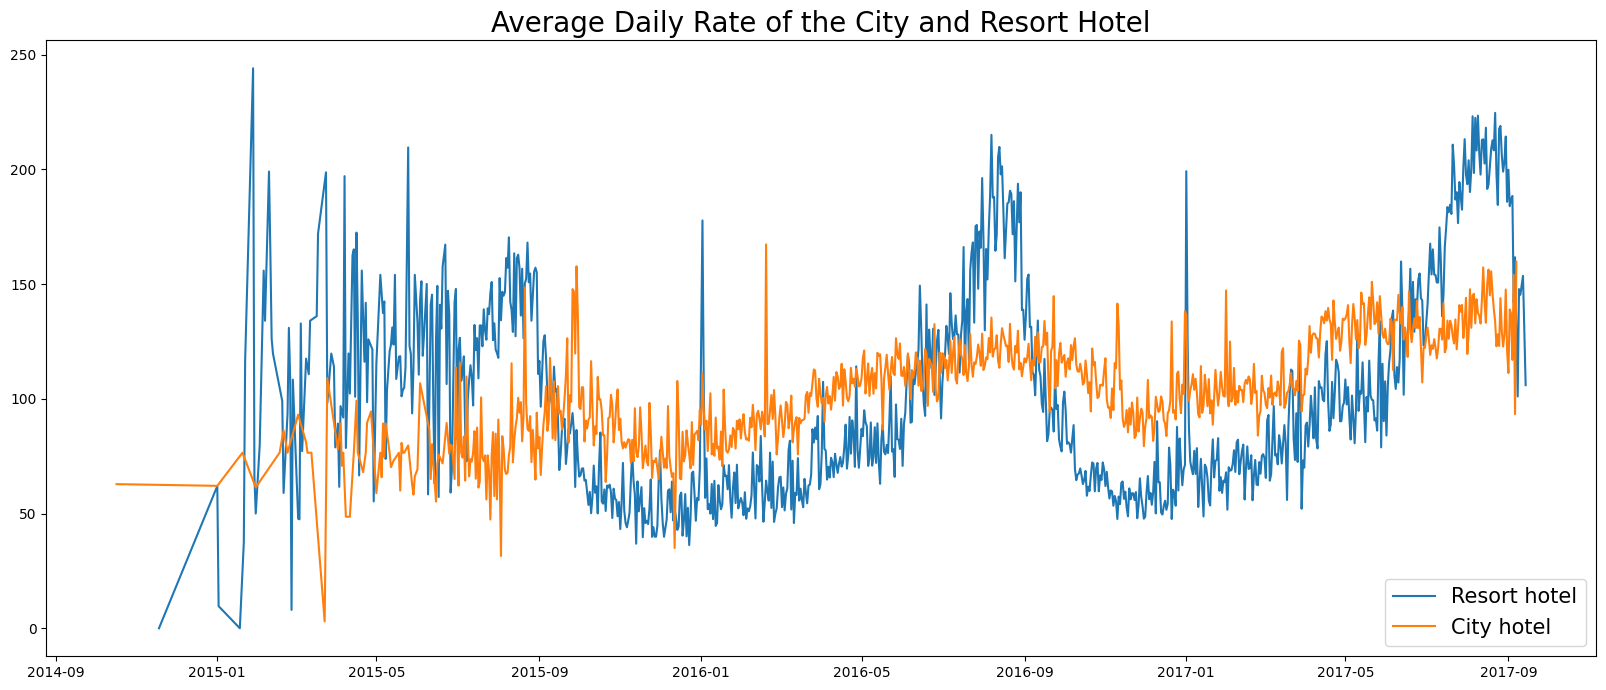

In [22]:
plt.figure(figsize = (20,8))
plt.title("Average Daily Rate of the City and Resort Hotel", fontsize = 20)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = "Resort hotel")
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City hotel')
plt.legend(fontsize = 15)

**The above graph illustrates price fluctuations where, on certain days, resort hotel rates exceed those of city hotels, while on other days, the reverse is true. These pricing dynamics may be influenced by factors such as seasonality, local events, or demand fluctuations. To optimize revenue, hotels should consider implementing dynamic pricing strategies that adapt to these fluctuations and maximize profitability during peak demand periods.**

 Lets find what in which time of the month was the hotel cancellations high

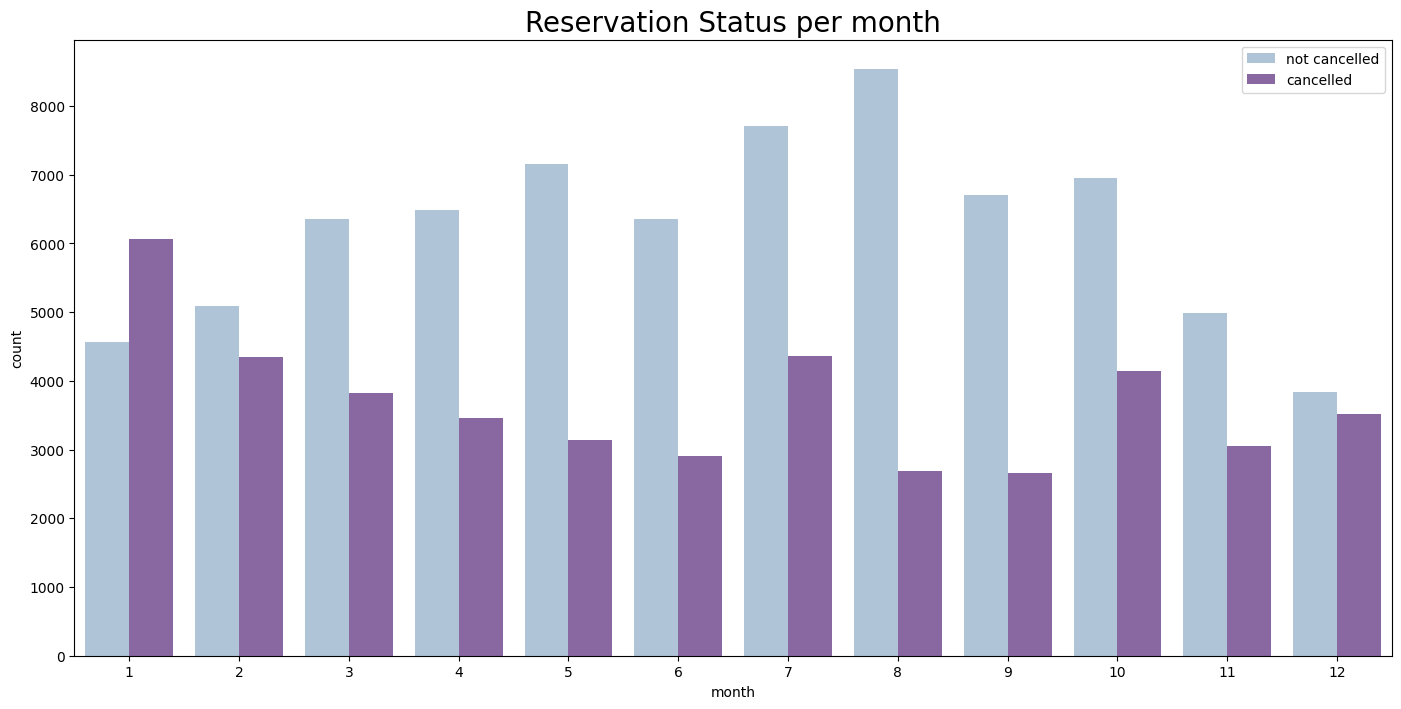

In [23]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (17,8))
sns.countplot(x = 'month',hue = 'is_canceled', data = df, palette = "BuPu")
plt.title("Reservation Status per month", fontsize = 20)
plt.legend(["not cancelled", "cancelled"])

**The provided graph displays a yearly overview of reservations, distinguishing between those that were canceled and those that were not. It is evident that January experiences the highest rate of cancellations, while August records the highest number of reservations. Additionally, August also has the lowest count of not canceled reservations, indicating the need for focused strategies to reduce cancellations during the month with the highest demand**


Lets us find out the reason for the high cancellations in the month of january and lowest cancellations in the month of august
is it the prices i.e the average daily rate 

In [24]:
a = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()

Text(0.5, 1.0, 'ADR per month')

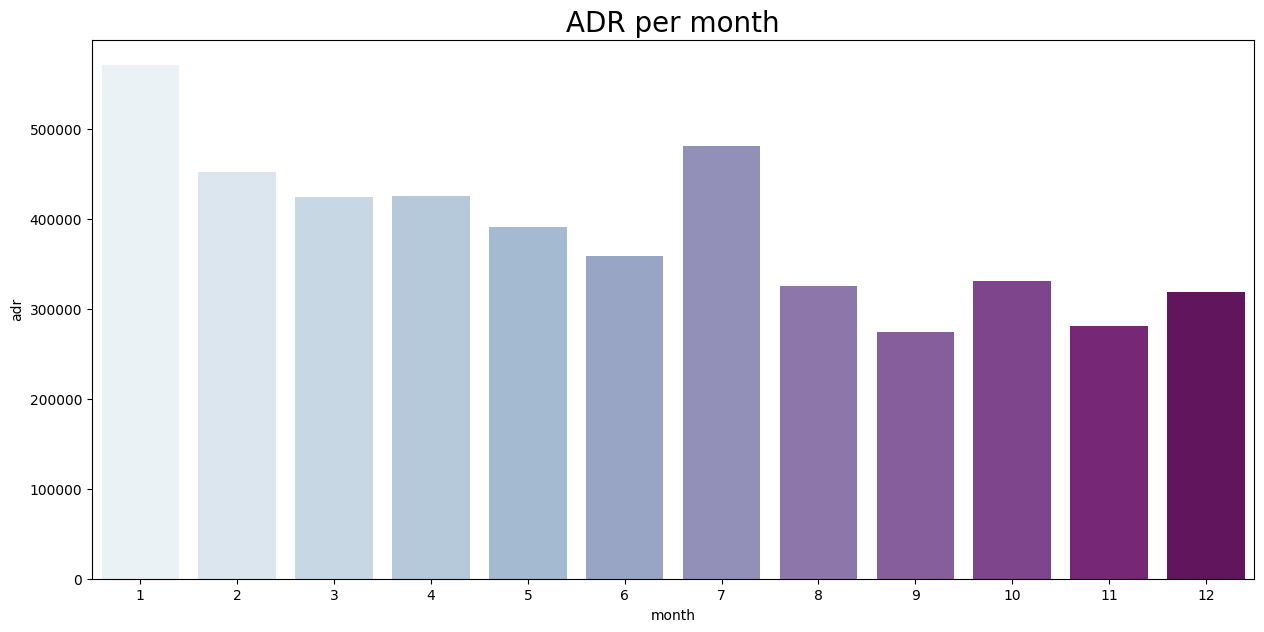

In [25]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'month', y = 'adr', data =  a, palette = "BuPu")
plt.title("ADR per month", fontsize = 20)

**The above plot provides insights into the Average Daily Rate (ADR) for different months. Notably, January has the highest ADR, which may contribute to the increased cancellations during this month. Conversely, August and September have the lowest ADR, potentially resulting in fewer cancellations in August due to the more affordable pricing compared to January. Understanding the impact of ADR on booking trends can inform pricing and revenue management strategies to optimize reservation retention.**

**Lets narrow down the country to top 10 countries **

In [26]:
cancelled_reservations = df[df['is_canceled'] == 1]
not_cancelled_reservations = df[df['is_canceled'] == 0]

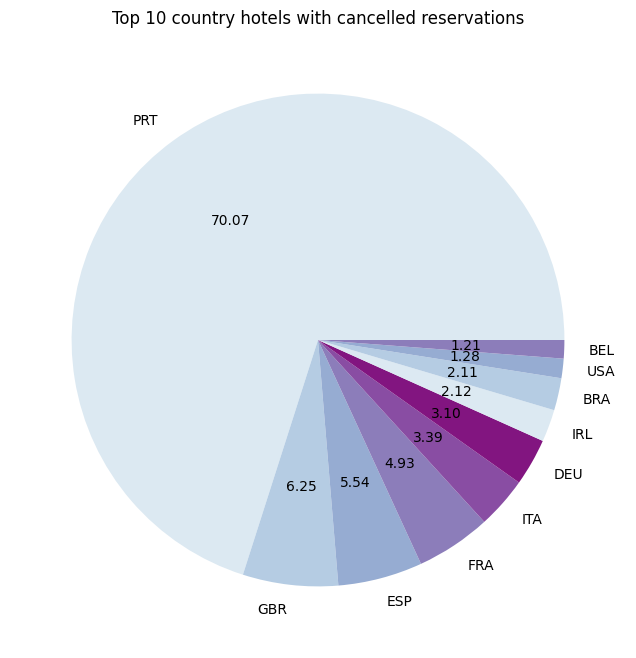

In [27]:
top_10_countries = (cancelled_reservations['country'].value_counts()[:10])
plt.figure(figsize = (20,8))
plt.title("Top 10 country hotels with cancelled reservations")
plt.pie(top_10_countries,labels = top_10_countries.index, autopct = '%.2f', colors=sns.color_palette('BuPu'),
)
plt.show()

**The cancellations being primarily due to the higher Average Daily Rate (ADR) in Portugal hotels is an important observation. To mitigate this issue, hotels in Portugal could consider pricing strategies that offer more competitive and flexible rates, especially during periods of high ADR, to attract and retain guests. By addressing the ADR-related factors, hotels can work toward reducing cancellations and optimizing revenue.**

Now lets see the market segment from where the majoritity of the customers that cancel reservations are coming from

In [28]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [29]:
market_segment = cancelled_reservations['market_segment'].value_counts(normalize = True)
market_segment.sort_values()

market_segment
Aviation         0.001178
Complementary    0.002038
Corporate        0.022150
Direct           0.043485
Offline TA/TO    0.187484
Groups           0.273979
Online TA        0.469685
Name: proportion, dtype: float64

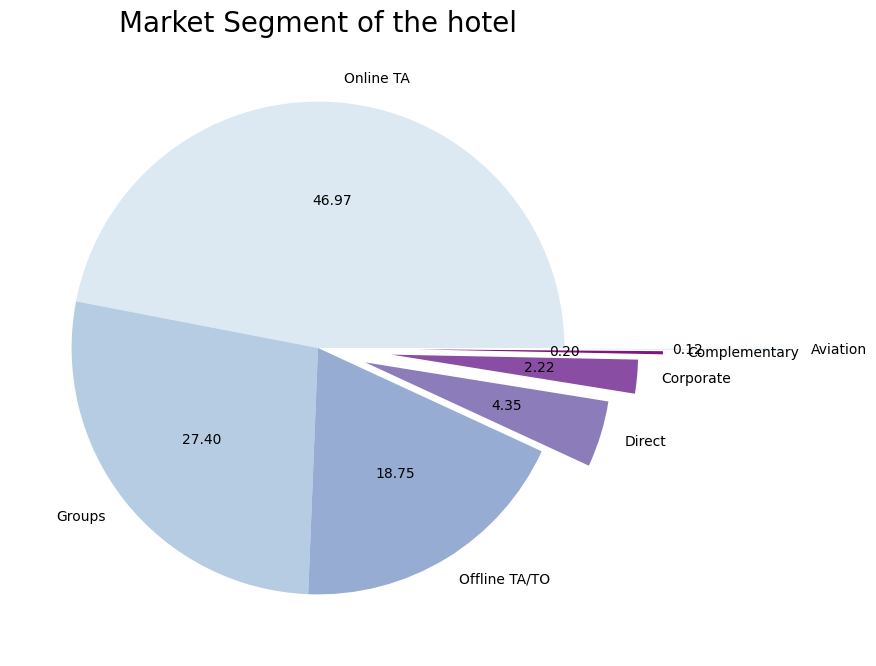

In [30]:
plt.figure(figsize = (20,8))
plt.title("Market Segment of the hotel", fontsize = 20)
explode = (0,0,0,0.2,0.3,0.4,0.9)
plt.pie(market_segment, labels = market_segment.index, autopct = '%.2f', colors=sns.color_palette('BuPu'), explode = explode)
plt.show()

**Cancellations stemming from online travel agents (OTAs) registering the highest rate is a noteworthy insight. To address this, hotels may want to collaborate closely with OTAs to refine booking policies, communication, and pricing strategies. This can help reduce the impact of cancellations originating from this source and enhance overall booking retention and profitability.**

Now lets see is the price high of the cancelled reservations or not cancelled reservations

In [31]:
cancelled_reservations_adr = cancelled_reservations.groupby('reservation_status_date')[['adr']].mean()
cancelled_reservations_adr.reset_index(inplace = True)
cancelled_reservations_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_reservations_adr = not_cancelled_reservations.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_reservations_adr.reset_index(inplace = True)
not_cancelled_reservations_adr.sort_values('reservation_status_date', inplace = True)

In [32]:
cancelled_reservations_adr = cancelled_reservations_adr[(cancelled_reservations_adr['reservation_status_date']>'2016-01') & (cancelled_reservations_adr['reservation_status_date']<'2017-09')]
not_cancelled_reservations_adr = not_cancelled_reservations_adr[(not_cancelled_reservations_adr['reservation_status_date']>'2016-01') & (not_cancelled_reservations_adr['reservation_status_date']<'2017-09')]

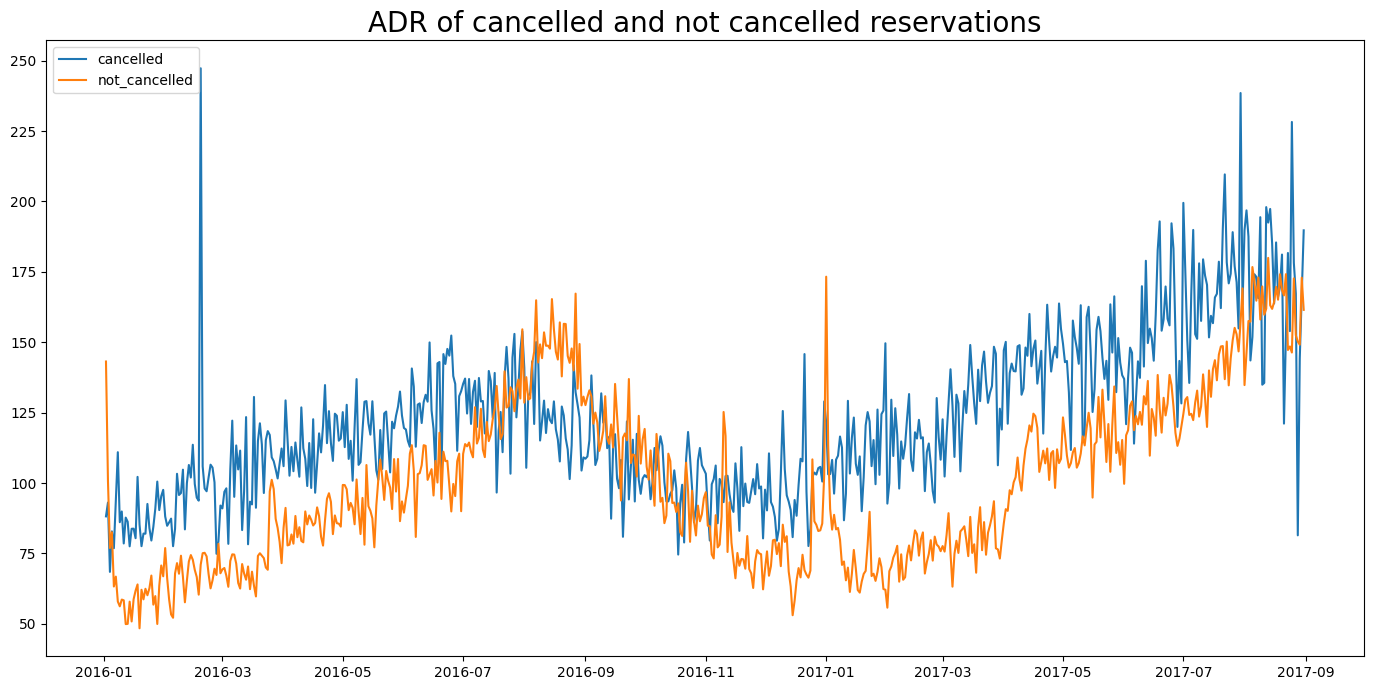

In [33]:
plt.figure(figsize = (17,8))
plt.title("ADR of cancelled and not cancelled reservations", fontsize = 20)
plt.plot(cancelled_reservations_adr['reservation_status_date'],cancelled_reservations_adr['adr'], label = 'cancelled' )
plt.plot(not_cancelled_reservations_adr['reservation_status_date'],not_cancelled_reservations_adr['adr'], label = 'not cancelled' )
plt.legend(['cancelled' , 'not_cancelled'])

**The provided figure underscores that pricing, particularly the Average Daily Rate (ADR), significantly influences hotel booking cancellations. It suggests that higher ADR is a major driver of cancellations. To enhance booking retention and overall performance, hotels should consider optimizing pricing strategies, possibly by offering more competitive and flexible rates during peak cancellation-prone periods. This customer-centric approach can help mitigate the impact of ADR on cancellations.**

**SUGGESTIONS**
Your conclusions and recommendations are well-founded and provide valuable insights for hotels to improve booking retention and overall performance:

1. **Pricing Impact**: It's clear that price is a significant factor affecting hotel reservation cancellations. City hotels, in particular, should consider revising their pricing strategies to be more competitive and flexible, especially during periods with high cancellation rates.

2. **Social Media Utilization**: Leveraging social media for advertising and updates, along with offering weekend and holiday discounts, can help hotels attract and engage with potential guests. Effective social media marketing can enhance visibility and draw more bookings.

3. **Online Travel Agents (OTAs)**: Given the prominence of OTAs in the market segment, portraying a realistic and accurate online image of the hotel is crucial. Transparency and consistency in marketing materials can help build trust and manage guest expectations, ultimately reducing cancellations.

Implementing these recommendations can aid hotels in reducing cancellations and increasing bookings, leading to improved guest satisfaction and financial performance.